In [6]:
#add task id
import pandas as pd
df = pd.read_csv('df_phase_distance.csv')
# Filter rows where taskId is not equal to 0
df_filtered = df[df['taskId'] != 0]
df_filtered.to_csv('df_distance_tj.csv')

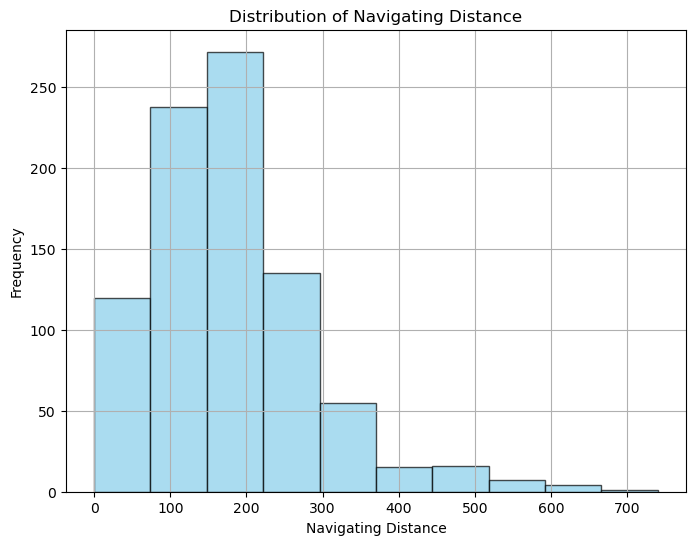

In [9]:
#add task id
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('df_distance_tj.csv')

# Plot navigating_distance distribution
plt.figure(figsize=(8, 6))
plt.hist(df['navigating_distance'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Navigating Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Navigating Distance')
plt.grid(True)
plt.show()

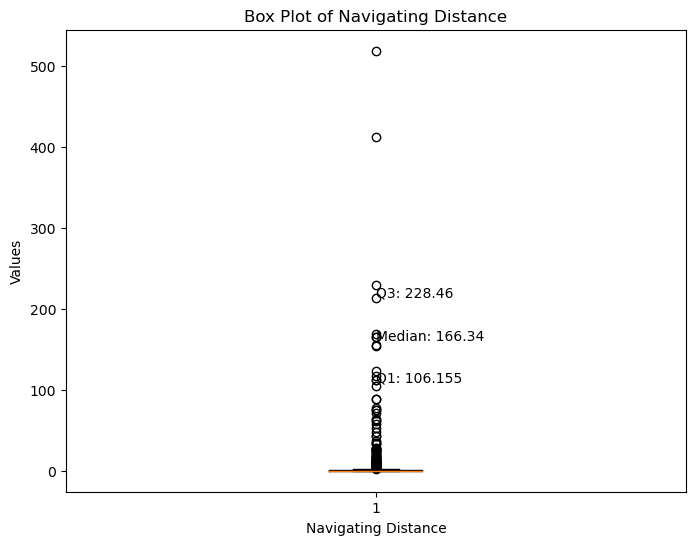

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_csv('df_distance_tj.csv')

# Create a box plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(df['planning_distance'])

# Add median value
median = df['navigating_distance'].median()
plt.text(1, median, f'Median: {median}', horizontalalignment='left', verticalalignment='center')

# Add quartile values
q1 = df['navigating_distance'].quantile(0.25)
q3 = df['navigating_distance'].quantile(0.75)
plt.text(1, q1, f'Q1: {q1}', horizontalalignment='left', verticalalignment='bottom')
plt.text(1, q3, f'Q3: {q3}', horizontalalignment='left', verticalalignment='top')

plt.xlabel('Navigating Distance')
plt.ylabel('Values')
plt.title('Box Plot of Navigating Distance')
plt.show()


Outlier values: [559.04]


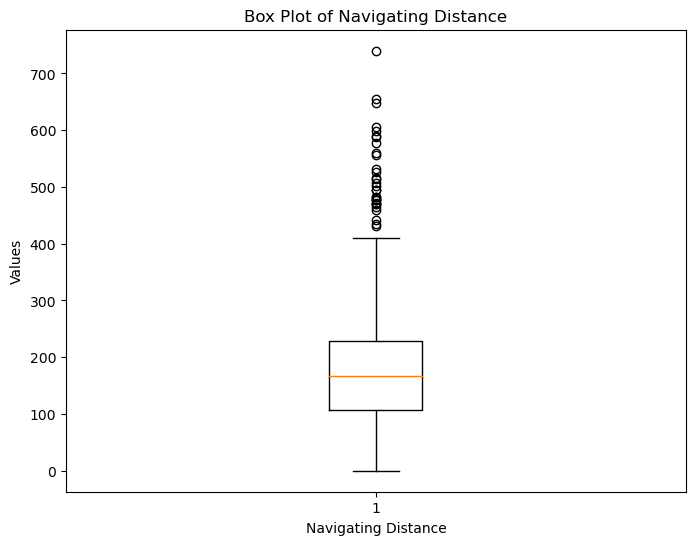

In [8]:
# outlier 
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_csv('df_distance_tj.csv')

# Create a box plot using Matplotlib
plt.figure(figsize=(8, 6))
box = plt.boxplot(df['navigating_distance'])
print(box['fliers'])

# Extract outlier values
outlier_values = [f.get_ydata()[0] for f in box['fliers']]

print("Outlier values:", outlier_values)

plt.xlabel('Navigating Distance')
plt.ylabel('Values')
plt.title('Box Plot of Navigating Distance')
plt.show()


In [ ]:
#calculate turns in trajectory

import numpy as np
import pandas as pd

# Load your trajectory dataset into a pandas DataFrame (replace 'trajectory.csv' with your actual file path)
df = pd.read_csv('df_lockmark.csv')

# Filter trajectory data based on conditions (participant == 38, scenario == 4, taskId == 4, phase == 'navigation')
trajectory = df[(df['participant'] == 38) & (df['scenario'] == 4) & (df['taskId'] == 4) & (df['phase'] == 'navigation')]

# Function to calculate angle between two vectors
def angle_between(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cos_theta = dot_product / (norm_v1 * norm_v2)
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

# Set threshold angle
threshold_angle = 0  # Example threshold angle in degrees

# Detect turns
for i in range(len(trajectory) - 2):
    point1 = trajectory.iloc[i]
    point2 = trajectory.iloc[i + 1]
    point3 = trajectory.iloc[i + 2]
    
    v1 = np.array([point2['posX'] - point1['posX'], point2['posZ'] - point1['posZ']])
    v2 = np.array([point3['posX'] - point2['posX'], point3['posZ'] - point2['posZ']])
    
    angle = angle_between(v1, v2)
    
    if angle > threshold_angle:
        print(f"Turn detected at index {i + 1}, angle: {angle} degrees")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample trajectory data (replace with your actual trajectory data)
# Trajectory data
trajectory = np.array([[0, 0], [1, 1], [2, 0], [3, 3], [4, 4]])

# Extract x and y coordinates from the trajectory array
x_coords = trajectory[:, 0]
y_coords = trajectory[:, 1]

# Plot the trajectory
plt.scatter(x_coords, y_coords)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Trajectory Plot')
plt.grid(True)
plt.show()

# Function to calculate angle between two vectors
def angle_between(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cos_theta = dot_product / (norm_v1 * norm_v2)
    return np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

# Set threshold angle
threshold_angle = 45  # Example threshold angle in degrees

# Detect turns
for i in range(len(trajectory) - 2):
    v1 = trajectory[i + 1] - trajectory[i]
    v2 = trajectory[i + 2] - trajectory[i + 1]
    angle = angle_between(v1, v2)
    if angle > threshold_angle:
        print(f"Turn detected at index {i+1}, angle: {angle} degrees")


In [ ]:
####### significance analysis 
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr

df_screenlock = pd.read_csv('screenlock.csv')

corr_coeff, p_value = pearsonr(df_screenlock['Percentage of screenlocked time'], df_screenlock['sbsod_score'])
print("Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)



In [ ]:
# Separate data by gender
import pandas as pd
import statsmodels.api as sm

# Load the data
df_screenlock = pd.read_csv('screenlock.csv')

# Encode gender as binary variable (1 for Female, 0 for Male)
df_screenlock['is_female'] = (df_screenlock['gender'] == 'Female').astype(int)

# Define independent variable (X) and dependent variable (y)
X = df_screenlock[['is_female']]  # Independent variable (gender)
y = df_screenlock['Percentage of screenlocked time']  # Dependent variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())



In [11]:
# plot the trajectory which is under the 100. 
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

df = pd.read_csv('df_distance_tj.csv')
                 
filtered_data = df[(df['navigating_distance'] > 0) & (df['navigating_distance'] < 50)]

# Select 'participant', 'scenario', and 'taskId' columns from the filtered data
selected_data = filtered_data[['participant', 'scenario', 'taskId']]

print(selected_data)

raw_df = pd.read_csv('df_lockmark.csv')

selected_data['combination'] = selected_data['participant'].astype(str) + '_' + \
                                selected_data['scenario'].astype(str) + '_' + \
                                selected_data['taskId'].astype(str)

# Create a unique combination identifier for the raw_df DataFrame
raw_df['combination'] = raw_df['participant'].astype(str) + '_' + \
                        raw_df['scenario'].astype(str) + '_' + \
                        raw_df['taskId'].astype(str)

# Filter raw data based on selected participant, scenario, and taskId combinations
filtered_raw_data = raw_df[(raw_df['combination'].isin(selected_data['combination'])) & (raw_df['phase'] == 'navigation')]


filtered_raw_data.to_csv('under100.csv')

     participant  scenario  taskId
19             9         1     4.0
23             9         2     4.0
35            10         1     4.0
54            12         2     3.0
85            15         2     2.0
99            16         1     4.0
151           19         2     4.0
167           20         2     4.0
170           20         3     3.0
171           20         3     4.0
199           22         2     4.0
243           25         1     4.0
247           25         2     4.0
282           27         3     3.0
290           28         1     3.0
354           32         1     4.0
382           33         4     4.0
394           34         3     4.0
398           34         4     4.0
402           35         1     4.0
406           35         2     4.0
443           37         4     1.0
454           38         2     4.0
493           40         4     3.0
502           41         2     4.0
506           41         3     4.0
529           43         1     3.0
541           43    

C:\Users\xuzhengfang\AppData\Local\Temp\ipykernel_348\2556941088.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#plot interactive
# add screen lock points 
### using dash
import plotly.express as px
import pandas as pd
import base64
from PIL import Image
import dash
from dash import dcc, html, Input, Output

#_______________________________________data preparation
# Load your dataset
data = pd.read_csv('under100.csv')
# Define a dictionary mapping scenario numbers to colors
scenario_type = {
    1: 'no_adaptive & low_traffic',
    2: 'adaptive & low_traffic',
    3: 'no_adaptive & high_traffic',
    4: 'adaptive & high_traffic'
}

# Add a new column 'scenario_type' based on the 'scenario' column
data['scenario_type'] = data['scenario'].map(scenario_type)

# Convert 'posX' and 'posZ' columns to numerical type
data['posX'] = pd.to_numeric(data['posX'], errors='coerce')
data['posZ'] = pd.to_numeric(data['posZ'], errors='coerce')

# Load your background image and get dimensions
with open("map_vector_v3_icons.png", "rb") as background_image:
    encoded_string = base64.b64encode(background_image.read()).decode('utf-8')
    img = Image.open(background_image)
    img_width, img_height = img.size

##_______________________________________create dash
app = dash.Dash(__name__)

# Define dropdown options based on unique scenarios
scenario_dropdown_options = [{'label': f'Scenario {scenario}', 'value': scenario} for scenario in data['scenario'].unique()]

# Define dropdown options based on unique start points
start_point_dropdown_options = [{'label': f'Start Point {point}', 'value': point} for point in data['start_point'].unique()]

# Define dropdown options based on unique route names
cleaned_data = data.dropna(subset=['routename'])
route_names = cleaned_data['routename'].unique()
route_dropdown_options = [{'label': name, 'value': name} for name in route_names]


# _________________________app layout
# Define app layout
app.layout = html.Div([
    html.Div([
        html.Label('Scenario', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='scenario-dropdown',
            options=scenario_dropdown_options,
            value=None,  # Default value is the first scenario in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '10px', 'z-index': '1'}),  # Add margin between dropdowns
    
    html.Div([
        html.Label('Start Point', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='start-point-dropdown',
            options=start_point_dropdown_options,
            value=None,  # Default value is the first start point in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '300px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
        html.Label('Route', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='route-dropdown',
            options=route_dropdown_options,
            value=None,  # Default value is the first route name in the dataset
            style={'width': '200%', 'whiteSpace': 'nowrap'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '600px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
            html.Label('Highlight Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='highlight-points',
                options=[
                    {'label': 'Highlight map interaction points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '900px', 'z-index': '1'}), 

    html.Div([
            html.Label('Lockscreen Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='lockscreen-points',
                options=[
                    {'label': 'Highlight lockscreen points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '1200px', 'z-index': '1'}),  # Adjust position here



    html.Div(dcc.Graph(
        id='output-graph',
        style={'height': '1300px'}  # Adjust height here
    )),
], style={'margin': '20px', 'z-index': '0'})  # Adjust margin to create space around the layout






# _________________________callback
@app.callback(
    Output('output-graph', 'figure'),
    [Input('scenario-dropdown', 'value'),
     Input('start-point-dropdown', 'value'),
     Input('route-dropdown', 'value'),
     Input('highlight-points', 'value'),
     Input('lockscreen-points', 'value')]
)
def update_graph(selected_scenarios, selected_start_points, selected_routes, highlight, lockscreen_highlight):
    # Initialize filtered data with the entire dataset
    filtered_data = data.copy()

    # Filter data based on selected scenarios, start points, and route names if they are not empty
    if selected_scenarios:
        filtered_data = filtered_data[filtered_data['scenario'].isin(selected_scenarios)]
    if selected_start_points:
        filtered_data = filtered_data[filtered_data['start_point'].isin(selected_start_points)]
    if selected_routes:
        filtered_data = filtered_data[filtered_data['routename'].isin(selected_routes)]

    # Create a scatter plot with background image
    fig = px.scatter(filtered_data, x='posX', y='posZ', color='scenario_type')



    if highlight == 'highlight':
    # Define interactions to highlight
        interactions_to_highlight = ['mapLog:positionXYZ', 'mapLog:zoom', 'mapLog:isScreenLocked+True', 'mapLog:MapButtonPoiClick+buttonOnFollowPlayer', 'mapLog:MapButtonPoiClick+buttonOnFocusOnPlayer']
        
        # Update marker colors based on mapInteractions
        marker_colors = []
        for interaction in filtered_data['mapInteractions']:
            if  any(interaction_to_highlight in str(interaction) for interaction_to_highlight in interactions_to_highlight):
                marker_colors.append('red')
            else:
                marker_colors.append('grey')
                
        print(marker_colors)  # Debugging statement to check marker colors
    
        fig.update_traces(marker=dict(color=marker_colors, size=[6 if color == 'red' else 4 for color in marker_colors]))

    elif lockscreen_highlight == 'highlight':  
        # Update marker colors based on lockscreen column
        marker_colors = ['blue' if lock == 1 else 'grey' for lock in filtered_data['lockscreen']]
        fig.update_traces(marker=dict(color=marker_colors, size=[6 if color == 'blue' else 4 for color in marker_colors]))
    
    else:
        # Adjust the size of all points
        fig.update_traces(marker=dict(size=3))

        

    # Add background image
    fig.update_layout(images=[dict(
        source=f'data:image/ext;base64,{encoded_string}',
        xref="x",
        yref="y",
        x=-1349.39,
        y=-217.9444,
        sizex=1510.5924,  # Set sizex to the width of the image
        sizey=1437.8156,  # Set sizey to the height of the image
        sizing="stretch",
        opacity=1,
        layer="below")])

    # Set fixed ranges for x and y axess
    fig.update_layout(xaxis=dict(range=[-1349.39, 161.2027 ]), yaxis=dict(range=[-1655.76, -217.9444]))

    # Return the plot
    return fig




# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
#plot interactive
# change color for different log types 
### using dash
import plotly.express as px
import pandas as pd
import base64
from PIL import Image
import dash
from dash import dcc, html, Input, Output

#_______________________________________data preparation
# Load your dataset
data = pd.read_csv('under100.csv')
# Define a dictionary mapping scenario numbers to colors
scenario_type = {
    1: 'no_adaptive & low_traffic',
    2: 'adaptive & low_traffic',
    3: 'no_adaptive & high_traffic',
    4: 'adaptive & high_traffic'
}

# Add a new column 'scenario_type' based on the 'scenario' column
data['scenario_type'] = data['scenario'].map(scenario_type)

# Convert 'posX' and 'posZ' columns to numerical type
data['posX'] = pd.to_numeric(data['posX'], errors='coerce')
data['posZ'] = pd.to_numeric(data['posZ'], errors='coerce')

# Load your background image and get dimensions
with open("map_vector_v3_icons.png", "rb") as background_image:
    encoded_string = base64.b64encode(background_image.read()).decode('utf-8')
    img = Image.open(background_image)
    img_width, img_height = img.size

##_______________________________________create dash
app = dash.Dash(__name__)

# Define dropdown options based on unique scenarios
scenario_dropdown_options = [{'label': f'Scenario {scenario}', 'value': scenario} for scenario in data['scenario'].unique()]

# Define dropdown options based on unique start points
start_point_dropdown_options = [{'label': f'Start Point {point}', 'value': point} for point in data['start_point'].unique()]

# Define dropdown options based on unique route names
cleaned_data = data.dropna(subset=['routename'])
route_names = cleaned_data['routename'].unique()
route_dropdown_options = [{'label': name, 'value': name} for name in route_names]


# _________________________app layout
# Define app layout
app.layout = html.Div([
    html.Div([
        html.Label('Scenario', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='scenario-dropdown',
            options=scenario_dropdown_options,
            value=None,  # Default value is the first scenario in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '10px', 'z-index': '1'}),  # Add margin between dropdowns
    
    html.Div([
        html.Label('Start Point', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='start-point-dropdown',
            options=start_point_dropdown_options,
            value=None,  # Default value is the first start point in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '300px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
        html.Label('Route', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='route-dropdown',
            options=route_dropdown_options,
            value=None,  # Default value is the first route name in the dataset
            style={'width': '200%', 'whiteSpace': 'nowrap'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '600px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
            html.Label('Highlight Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='highlight-points',
                options=[
                    {'label': 'Highlight map interaction points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '900px', 'z-index': '1'}), 

    html.Div([
            html.Label('Lockscreen Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='lockscreen-points',
                options=[
                    {'label': 'Highlight lockscreen points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '1200px', 'z-index': '1'}),  # Adjust position here



    html.Div(dcc.Graph(
        id='output-graph',
        style={'height': '1300px'}  # Adjust height here
    )),
], style={'margin': '20px', 'z-index': '0'})  # Adjust margin to create space around the layout






# _________________________callback
@app.callback(
    Output('output-graph', 'figure'),
    [Input('scenario-dropdown', 'value'),
     Input('start-point-dropdown', 'value'),
     Input('route-dropdown', 'value'),
     Input('highlight-points', 'value'),
     Input('lockscreen-points', 'value')]
)
def update_graph(selected_scenarios, selected_start_points, selected_routes, highlight, lockscreen_highlight):
    # Initialize filtered data with the entire dataset
    filtered_data = data.copy()

    # Filter data based on selected scenarios, start points, and route names if they are not empty
    if selected_scenarios:
        filtered_data = filtered_data[filtered_data['scenario'].isin(selected_scenarios)]
    if selected_start_points:
        filtered_data = filtered_data[filtered_data['start_point'].isin(selected_start_points)]
    if selected_routes:
        filtered_data = filtered_data[filtered_data['routename'].isin(selected_routes)]

    # Create a scatter plot with background image
    fig = px.scatter(filtered_data, x='posX', y='posZ', color='scenario_type')



    if highlight == 'highlight':
        # Define interactions to highlight
        interactions_to_highlight = {
            'mapLog:positionXYZ': 'blue',
            'mapLog:zoom': 'green',
            'mapLog:isScreenLocked+False': 'orange',
            'mapLog:MapButtonPoiClick+buttonOnFollowPlayer': 'purple',
            'mapLog:MapButtonPoiClick+buttonOnFocusOnPlayer': 'pink'
        }
        
        # Update marker colors based on mapInteractions
        marker_colors = []
        for interaction in filtered_data['mapInteractions']:
            color = 'grey'  # Default color if not matched
            for key in interactions_to_highlight:
                if key in str(interaction):
                    color = interactions_to_highlight[key]
                    break
            marker_colors.append(color)
        
        print(marker_colors)  # Debugging statement to check marker colors
        
        # Update trace markers with colors
        fig.update_traces(marker=dict(color=marker_colors, size=[8 if color != 'grey' else 4 for color in marker_colors]))



    elif lockscreen_highlight == 'highlight':  
        # Update marker colors based on lockscreen column
        marker_colors = ['blue' if lock == 1 else 'grey' for lock in filtered_data['lockscreen']]
        fig.update_traces(marker=dict(color=marker_colors, size=[6 if color == 'blue' else 4 for color in marker_colors]))
    
    else:
        # Adjust the size of all points
        fig.update_traces(marker=dict(size=3))

        

    # Add background image
    fig.update_layout(images=[dict(
        source=f'data:image/ext;base64,{encoded_string}',
        xref="x",
        yref="y",
        x=-1349.39,
        y=-217.9444,
        sizex=1510.5924,  # Set sizex to the width of the image
        sizey=1437.8156,  # Set sizey to the height of the image
        sizing="stretch",
        opacity=1,
        layer="below")])

    # Set fixed ranges for x and y axess
    fig.update_layout(xaxis=dict(range=[-1349.39, 161.2027 ]), yaxis=dict(range=[-1655.76, -217.9444]))

    # Return the plot
    return fig




# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
#plot interactive add popup
# change color for different log types 
### using dash
import plotly.express as px
import pandas as pd
import base64
from PIL import Image
import dash
from dash import dcc, html, Input, Output

#_______________________________________data preparation
# Load your dataset
data = pd.read_csv('under100.csv')
# Define a dictionary mapping scenario numbers to colors
scenario_type = {
    1: 'no_adaptive & low_traffic',
    2: 'adaptive & low_traffic',
    3: 'no_adaptive & high_traffic',
    4: 'adaptive & high_traffic'
}

# Add a new column 'scenario_type' based on the 'scenario' column
data['scenario_type'] = data['scenario'].map(scenario_type)

# Convert 'posX' and 'posZ' columns to numerical type
data['posX'] = pd.to_numeric(data['posX'], errors='coerce')
data['posZ'] = pd.to_numeric(data['posZ'], errors='coerce')

# Load your background image and get dimensions
with open("map_vector_v3_icons.png", "rb") as background_image:
    encoded_string = base64.b64encode(background_image.read()).decode('utf-8')
    img = Image.open(background_image)
    img_width, img_height = img.size

##_______________________________________create dash
app = dash.Dash(__name__)

# Define dropdown options based on unique scenarios
scenario_dropdown_options = [{'label': f'Scenario {scenario}', 'value': scenario} for scenario in data['scenario'].unique()]

# Define dropdown options based on unique start points
start_point_dropdown_options = [{'label': f'Start Point {point}', 'value': point} for point in data['start_point'].unique()]

# Define dropdown options based on unique route names
cleaned_data = data.dropna(subset=['routename'])
route_names = cleaned_data['routename'].unique()
route_dropdown_options = [{'label': name, 'value': name} for name in route_names]


# _________________________app layout
# Define app layout
app.layout = html.Div([
    html.Div([
        html.Label('Scenario', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='scenario-dropdown',
            options=scenario_dropdown_options,
            value=None,  # Default value is the first scenario in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '10px', 'z-index': '1'}),  # Add margin between dropdowns
    
    html.Div([
        html.Label('Start Point', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='start-point-dropdown',
            options=start_point_dropdown_options,
            value=None,  # Default value is the first start point in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '300px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
        html.Label('Route', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='route-dropdown',
            options=route_dropdown_options,
            value=None,  # Default value is the first route name in the dataset
            style={'width': '200%', 'whiteSpace': 'nowrap'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '600px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
            html.Label('Highlight Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='highlight-points',
                options=[
                    {'label': 'Highlight map interaction points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '900px', 'z-index': '1'}), 

    html.Div([
            html.Label('Lockscreen Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='lockscreen-points',
                options=[
                    {'label': 'Highlight lockscreen points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '1200px', 'z-index': '1'}),  # Adjust position here



    html.Div(dcc.Graph(
        id='output-graph',
        style={'height': '1300px'}  # Adjust height here
    )),
], style={'margin': '20px', 'z-index': '0'})  # Adjust margin to create space around the layout






# _________________________callback
@app.callback(
    Output('output-graph', 'figure'),
    [Input('scenario-dropdown', 'value'),
     Input('start-point-dropdown', 'value'),
     Input('route-dropdown', 'value'),
     Input('highlight-points', 'value'),
     Input('lockscreen-points', 'value')]
)

def update_graph(selected_scenarios, selected_start_points, selected_routes, highlight, lockscreen_highlight):
    # Initialize filtered data with the entire dataset
    filtered_data = data.copy()

    # Filter data based on selected scenarios, start points, and route names if they are not empty
    if selected_scenarios:
        filtered_data = filtered_data[filtered_data['scenario'].isin(selected_scenarios)]
    if selected_start_points:
        filtered_data = filtered_data[filtered_data['start_point'].isin(selected_start_points)]
    if selected_routes:
        filtered_data = filtered_data[filtered_data['routename'].isin(selected_routes)]

    # Create a scatter plot with background image
    fig = px.scatter(filtered_data, x='posX', y='posZ', color='scenario_type')

    if highlight == 'highlight':
        # Define interactions to highlight
        interactions_to_highlight = {
            'mapLog:positionXYZ': 'blue',
            'mapLog:zoom': 'green',
            'mapLog:isScreenLocked+False': 'orange',
            'mapLog:MapButtonPoiClick+buttonOnFollowPlayer': 'purple',
            'mapLog:MapButtonPoiClick+buttonOnFocusOnPlayer': 'pink'
        }
        
        # Update marker colors based on mapInteractions
        marker_colors = []
        for interaction in filtered_data['mapInteractions']:
            color = 'grey'  # Default color if not matched
            for key in interactions_to_highlight:
                if key in str(interaction):
                    color = interactions_to_highlight[key]
                    break
            marker_colors.append(color)
        
        # Update trace markers with colors and hover information
        fig.update_traces(marker=dict(color=marker_colors, size=[8 if color != 'grey' else 4 for color in marker_colors]),
                          hovertemplate='<b>Interaction:</b> %{text}<extra></extra>',
                          text=[', '.join([key for key in interactions_to_highlight if key in str(interaction)]) for interaction in filtered_data['mapInteractions']])

    elif lockscreen_highlight == 'highlight':  
        # Update marker colors based on lockscreen column
        marker_colors = ['blue' if lock == 1 else 'grey' for lock in filtered_data['lockscreen']]
        fig.update_traces(marker=dict(color=marker_colors, size=[6 if color == 'blue' else 4 for color in marker_colors]),
                          hovertemplate='<b>Lockscreen:</b> %{text}<extra></extra>',
                          text=['Locked' if lock == 1 else 'Unlocked' for lock in filtered_data['lockscreen']])

    else:
        # Adjust the size of all points
        fig.update_traces(marker=dict(size=3))

    # Add background image
    fig.update_layout(images=[dict(
        source=f'data:image/ext;base64,{encoded_string}',
        xref="x",
        yref="y",
        x=-1349.39,
        y=-217.9444,
        sizex=1510.5924,  # Set sizex to the width of the image
        sizey=1437.8156,  # Set sizey to the height of the image
        sizing="stretch",
        opacity=1,
        layer="below")])

    # Set fixed ranges for x and y axes
    fig.update_layout(xaxis=dict(range=[-1349.39, 161.2027]), yaxis=dict(range=[-1655.76, -217.9444]))

    # Return the plot
    return fig





# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [5]:
#changes for ppt
# change color for different log types 
### using dash
import plotly.express as px
import pandas as pd
import base64
from PIL import Image
import dash
from dash import dcc, html, Input, Output

#_______________________________________data preparation
# Load your dataset
data = pd.read_csv('df_lockmark.csv')
# Define a dictionary mapping scenario numbers to colors
scenario_type = {
    1: 'low_traffic',
    2: 'low_traffic',
    3: 'high_traffic',
    4: 'high_traffic'
}

# Add a new column 'scenario_type' based on the 'scenario' column
data['scenario_type'] = data['scenario'].map(scenario_type)
print(data['scenario_type'])

# Convert 'posX' and 'posZ' columns to numerical type
data['posX'] = pd.to_numeric(data['posX'], errors='coerce')
data['posZ'] = pd.to_numeric(data['posZ'], errors='coerce')

# Load your background image and get dimensions
with open("map_vector_v3_icons.png", "rb") as background_image:
    encoded_string = base64.b64encode(background_image.read()).decode('utf-8')
    img = Image.open(background_image)
    img_width, img_height = img.size

##_______________________________________create dash
app = dash.Dash(__name__)

# Define dropdown options based on unique scenarios
scenario_dropdown_options = [{'label': f'Scenario {scenario}', 'value': scenario} for scenario in data['scenario'].unique()]

# Define dropdown options based on unique start points
start_point_dropdown_options = [{'label': f'Start Point {point}', 'value': point} for point in data['start_point'].unique()]

# Define dropdown options based on unique route names
cleaned_data = data.dropna(subset=['routename'])
route_names = cleaned_data['routename'].unique()
route_dropdown_options = [{'label': name, 'value': name} for name in route_names]


# _________________________app layout
# Define app layout
app.layout = html.Div([
    html.Div([
        html.Label('Scenario', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='scenario-dropdown',
            options=scenario_dropdown_options,
            value=None,  # Default value is the first scenario in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '10px', 'z-index': '1'}),  # Add margin between dropdowns
    
    html.Div([
        html.Label('Start Point', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='start-point-dropdown',
            options=start_point_dropdown_options,
            value=None,  # Default value is the first start point in the dataset
            style={'width': '150%'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '300px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
        html.Label('Route', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='route-dropdown',
            options=route_dropdown_options,
            value=None,  # Default value is the first route name in the dataset
            style={'width': '200%', 'whiteSpace': 'nowrap'},
            multi=True,
        ),
    ], style={'position': 'absolute', 'top': '10px', 'left': '600px', 'z-index': '1'}),  # Add margin between dropdowns

    html.Div([
            html.Label('Highlight Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='highlight-points',
                options=[
                    {'label': 'Highlight map interaction points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '900px', 'z-index': '1'}), 

    html.Div([
            html.Label('Lockscreen Points', style={'font-weight': 'bold'}),
            dcc.RadioItems(
                id='lockscreen-points',
                options=[
                    {'label': 'Highlight lockscreen points', 'value': 'highlight'},
                    {'label': 'Do not highlight', 'value': 'none'}
                ],
                value='none',
                labelStyle={'display': 'block'}
            ),
        ], style={'position': 'absolute', 'top': '10px', 'left': '1200px', 'z-index': '1'}),  # Adjust position here



    html.Div(dcc.Graph(
        id='output-graph',
        style={'height': '1300px'}  # Adjust height here
    )),
], style={'margin': '20px', 'z-index': '0'})  # Adjust margin to create space around the layout






# _________________________callback
@app.callback(
    Output('output-graph', 'figure'),
    [Input('scenario-dropdown', 'value'),
     Input('start-point-dropdown', 'value'),
     Input('route-dropdown', 'value'),
     Input('highlight-points', 'value'),
     Input('lockscreen-points', 'value')]
)

def update_graph(selected_scenarios, selected_start_points, selected_routes, highlight, lockscreen_highlight):
    # Initialize filtered data with the entire dataset
    filtered_data = data.copy()

    # Filter data based on selected scenarios, start points, and route names if they are not empty
    if selected_scenarios:
        filtered_data = filtered_data[filtered_data['scenario'].isin(selected_scenarios)]
    if selected_start_points:
        filtered_data = filtered_data[filtered_data['start_point'].isin(selected_start_points)]
    if selected_routes:
        filtered_data = filtered_data[filtered_data['routename'].isin(selected_routes)]

    # Create a scatter plot with background image
    fig = px.scatter(filtered_data, x='posX', y='posZ', color='scenario_type')

    if highlight == 'highlight':
        # Define interactions to highlight
        interactions_to_highlight = {
            'mapLog:isScreenLocked+False': 'red'           
        }
        
        # Update marker colors based on mapInteractions
        marker_colors = []
        for interaction in filtered_data['mapInteractions']:
            color = 'grey'  # Default color if not matched
            for key in interactions_to_highlight:
                if key in str(interaction):
                    color = interactions_to_highlight[key]
                    break
            marker_colors.append(color)
        
        # Update trace markers with colors and hover information
        fig.update_traces(marker=dict(color=marker_colors, size=[8 if color != 'grey' else 4 for color in marker_colors]),
                          hovertemplate='<b>Interaction:</b> %{text}<extra></extra>',
                          text=[', '.join([key for key in interactions_to_highlight if key in str(interaction)]) for interaction in filtered_data['mapInteractions']])

    elif lockscreen_highlight == 'highlight':  
        # Update marker colors based on lockscreen column
        marker_colors = ['blue' if lock == 1 else 'grey' for lock in filtered_data['lockscreen']]
        fig.update_traces(marker=dict(color=marker_colors, size=[6 if color == 'blue' else 4 for color in marker_colors]),
                          hovertemplate='<b>Lockscreen:</b> %{text}<extra></extra>',
                          text=['Locked' if lock == 1 else 'Unlocked' for lock in filtered_data['lockscreen']])

    else:
        # Adjust the size of all points
        fig.update_traces(marker=dict(size=3))

    # Add background image
    fig.update_layout(images=[dict(
        source=f'data:image/ext;base64,{encoded_string}',
        xref="x",
        yref="y",
        x=-1349.39,
        y=-217.9444,
        sizex=1510.5924,  # Set sizex to the width of the image
        sizey=1437.8156,  # Set sizey to the height of the image
        sizing="stretch",
        opacity=1,
        layer="below")])

    # Set fixed ranges for x and y axes
    fig.update_layout(xaxis=dict(range=[-1349.39, 161.2027]), yaxis=dict(range=[-1655.76, -217.9444]))

    # Return the plot
    return fig





# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


0          low_traffic
1          low_traffic
2          low_traffic
3          low_traffic
4          low_traffic
              ...     
231955    high_traffic
231956    high_traffic
231957    high_traffic
231958    high_traffic
231959    high_traffic
Name: scenario_type, Length: 231960, dtype: object
